In [24]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [25]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [26]:
# To Obtain CSV
df=pd.read_csv("TSM_2018_2021.csv")
# Show teh data
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,40.509998,41.049999,40.419998,41.020000,36.531139,4984000
1,2018-01-03,41.590000,41.810001,41.439999,41.709999,37.145622,6963200
2,2018-01-04,41.919998,42.000000,41.450001,41.490002,36.949707,4876600


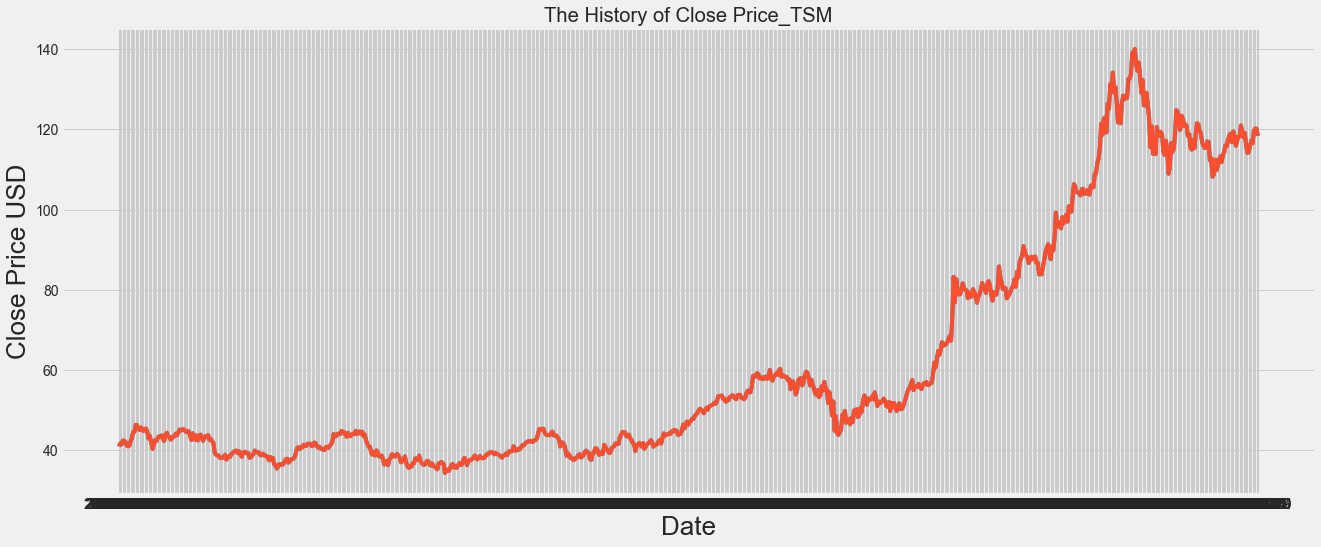

In [27]:
# # To change the format of Date in Python
#dates = mdates.date2num(df['Date'])
dates = df['Date']
plt.figure(figsize=(20,8))
plt.title('The History of Close Price_TSM')

closePrice = df['Close']
plt.plot_date(dates, closePrice,linestyle='solid', marker=None)
plt.plot(dates, closePrice)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Close Price USD', fontsize=26)
plt.show()

In [28]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len)

837


In [29]:
print(len(data))

881


In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data.shape)
print(scaled_data[:3])

(881, 1)
[[0.06301447]
 [0.06954298]
 [0.06746145]]


In [31]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data from 2-dimension to 3-dimension: [stock prices, timesteps, indicators]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

#x_train.shape[1]

[array([0.06301447, 0.06954298, 0.06746145, 0.07663921, 0.07644997,
       0.07398996, 0.06566371, 0.06310907, 0.06462293, 0.07446304,
       0.08297852, 0.09660326, 0.09754941, 0.11372883, 0.11278265,
       0.10379412, 0.10161791, 0.10748415, 0.10445644, 0.09953638,
       0.10360488, 0.10492951, 0.09603555, 0.08127543, 0.08733086,
       0.07115148, 0.0567698 , 0.06727221, 0.07730152, 0.0758823 ,
       0.08222157, 0.08666855, 0.08629008, 0.08875013, 0.08070771,
       0.07597689, 0.09026399, 0.0950894 , 0.0876147 , 0.08506005,
       0.07909925, 0.0818431 , 0.08638472, 0.08685779, 0.09310247,
       0.0893178 , 0.0967925 , 0.10275333, 0.10057717, 0.10209103,
       0.10360488, 0.10038793, 0.09688709, 0.09906331, 0.09783328,
       0.08827702, 0.07777463, 0.09376477, 0.08449238, 0.07881538])]
[0.08893932086404921]

[array([0.06301447, 0.06954298, 0.06746145, 0.07663921, 0.07644997,
       0.07398996, 0.06566371, 0.06310907, 0.06462293, 0.07446304,
       0.08297852, 0.09660326, 0.09

In [32]:
#3-dimension: [stock prices, timesteps, indicators]
x_train.shape

(777, 60, 1)

In [33]:
# Create the testing data set
# Create a new array containing scaled values (previous 60 days)
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)

# To Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
# first dense : 
model.add(Dense(25))
#second dense: output  
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)
model.save('my_TSM.h5')

In [35]:
###　Linear Regression
from sklearn.linear_model import LinearRegression

In [36]:
### Multiple Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], ), y_train.reshape(-1))

LinearRegression()

In [37]:
### data for Simple linear regression model 2
x_train_2 = np.arange(len(train_data)).reshape(-1, 1)
y_train_2 = dataset[0:int(training_data_len)].reshape(-1)

x_test_2 = np.arange(838, 838+len(y_test)).reshape(-1,1)
y_test_2 = dataset[int(training_data_len):].reshape(-1)
print(x_train_2.shape, y_train_2.shape)
print(x_test_2.shape, y_test_2.shape)

(837, 1) (837,)
(44, 1) (44,)


In [38]:
### Simple Linear Regression Model2
lr_model_2 = LinearRegression()
lr_model_2.fit(x_train_2, y_train_2)

LinearRegression()

In [39]:
# the models predicted price values 
model = load_model('my_TSM.h5')
''' LSTM'''
predictions = model.predict(x_test)
predictions_origin_scale = scaler.inverse_transform(predictions)

'''Alternative Linear Regression'''
lr_predictions = lr_model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1],))
lr_predictions_origin_scale = scaler.inverse_transform(np.expand_dims(lr_predictions, -1))

''' Linear Regression 2 '''
lr_predictions_2 = lr_model_2.predict(x_test_2)

<ipython-input-40-4f68d2054a32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['LSTM_Predictions'] = predictions_origin_scale
<ipython-input-40-4f68d2054a32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale
<ipython-input-40-4f68d2054a32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

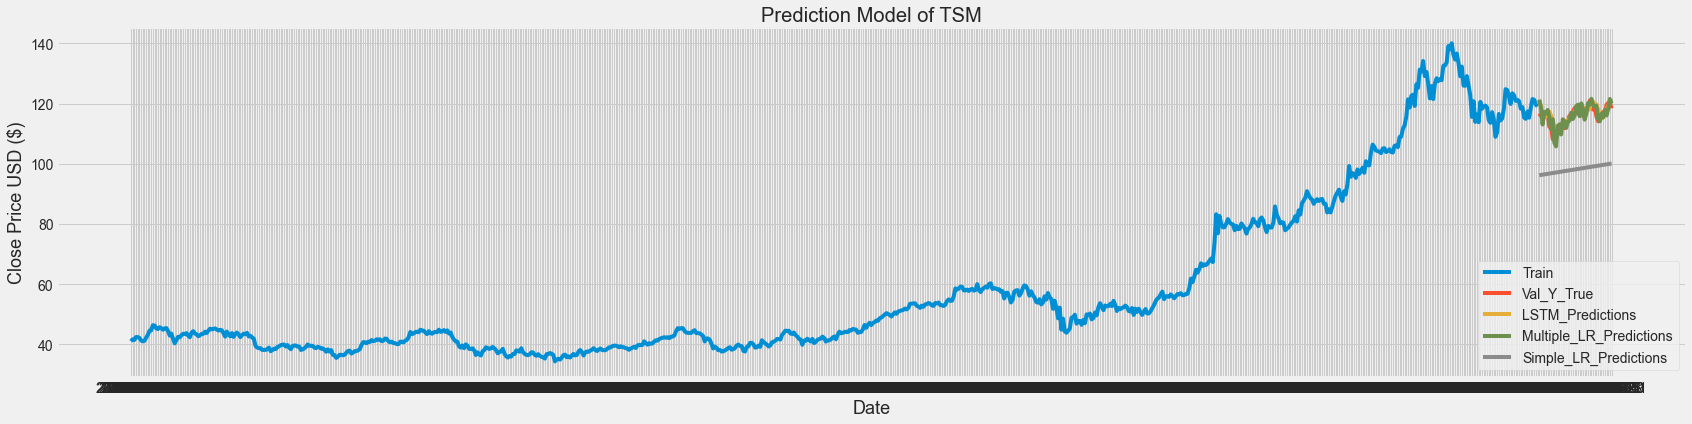

In [40]:
### Plot Training data, testing data and predictions
#training data 
train = data[:training_data_len]

# testing data
valid = data[training_data_len:]
valid['LSTM_Predictions'] = predictions_origin_scale
valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale 
valid['Simple_LR_Predictions'] = lr_predictions_2 
# Visualize the data


plt.figure(figsize=(26,6))
plt.title('Prediction Model of TSM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

trainDates = dates[:training_data_len]
validDates = dates[training_data_len:]
plt.plot_date(trainDates, train, linestyle='solid', marker=None)
plt.plot_date(validDates, valid, linestyle='solid', marker=None)


plt.legend(['Train', 'Val_Y_True', 'LSTM_Predictions', 'Multiple_LR_Predictions', 'Simple_LR_Predictions'], loc='lower right')

plt.show()

<ipython-input-41-d54fd379492b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['LSTM_Predictions'] = predictions_origin_scale
<ipython-input-41-d54fd379492b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale
<ipython-input-41-d54fd379492b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

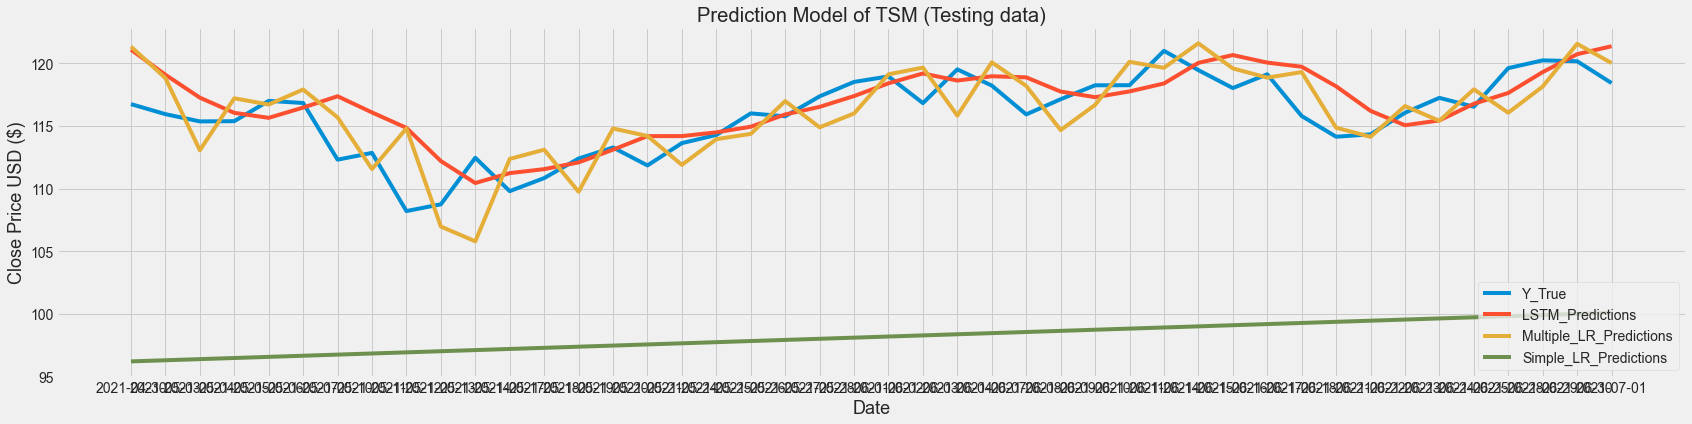

In [41]:
### Plot only Test Data

# testing data
valid = data[training_data_len:]
valid['LSTM_Predictions'] = predictions_origin_scale
valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale 
valid['Simple_LR_Predictions'] = lr_predictions_2 
# Visualize the data


plt.figure(figsize=(26,6))
plt.title('Prediction Model of TSM (Testing data)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

trainDates = dates[:training_data_len]
validDates = dates[training_data_len:]
#plt.plot_date(trainDates, train, linestyle='solid', marker=None)
plt.plot_date(validDates, valid, linestyle='solid', marker=None)


plt.legend(['Y_True', 'LSTM_Predictions', 'Multiple_LR_Predictions', 'Simple_LR_Predictions'], loc='lower right')

plt.show()


In [42]:
### Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = y_test
LSTM_mse = mean_squared_error(y_true,predictions_origin_scale)
LSTM_mae =  mean_absolute_error(y_true,predictions_origin_scale)

lr_mse = mean_squared_error(y_true,lr_predictions_origin_scale )
lr_mae = mean_absolute_error(y_true,lr_predictions_origin_scale)

lr_mse_2 = mean_squared_error(y_true,lr_predictions_2 )
lr_mae_2 = mean_absolute_error(y_true,lr_predictions_2)

print('LSTM_mse: ', LSTM_mse, 'LSTM_mae: ', LSTM_mae)
print('Multiple Linear_Regression_mse: ', lr_mse, 'Multiple_LR_Predictions_mae: ', lr_mae)
print('Simple Linear_Regression_mse: ', lr_mse_2, 'Simple_Linear_Regression_mae: ', lr_mae_2)

LSTM_mse:  5.179838321522606 LSTM_mae:  1.741831208640358
Multiple Linear_Regression_mse:  6.3742906945955635 Multiple_LR_Predictions_mae:  2.1075214841533576
Simple Linear_Regression_mse:  320.8420337165619 Simple_Linear_Regression_mae:  17.719041872444205


In [43]:
# min_True
#真實的第二波修正數字 
# true value in the second corrective wave

min_T = np.min(y_true) 


#WAVE PRINCIPLE

#in the first principle

# March to October the first wave 
max = 140.050003
min = 43.889999

count0382 = max-(max - min) * 0.382
count05 = max-(max - min) * 0.5
count0618 = max-(max - min) * 0.618


#min_LSTM prediction 
min_LSM = np.min(valid['LSTM_Predictions'])
min_MLR = np.min(valid['Multiple_LR_Predictions'])
min_LR = np.min(valid['Simple_LR_Predictions'])

print('ture_min_value_in testing data: ',min_T )
print('Min_LSTM predition: ', min_LSM )
print ('Min_Multiple_LR prediction: ',min_MLR)
print ('Min_SLR prediction: ',min_LR)
print ('0.381 second corr wave: ', count0382)
print ('0.5 second corr wave: ', count05)
print ('0.618 second corr wave: ', count0618)

ture_min_value_in testing data:  108.209999
Min_LSTM predition:  110.447509765625
Min_Multiple_LR prediction:  105.79650062600909
Min_SLR prediction:  96.22136220957799
0.381 second corr wave:  103.316881472
0.5 second corr wave:  91.970001
0.618 second corr wave:  80.623120528


In [44]:
#TSM CONCLUSION

#LSTM > Multiple LR > WP(0.381) > Simple LR 



In [45]:
# #真實的第二波修正數字 
# # true value in the second corrective wave

# min_True = float(min(y_true))
# min_True
# #min_LSTM prediction 
# min_LSM = min(valid['LSTM_Predictions'])
# min_MLR = min(valid['Multiple_LR_Predictions'])
# min_LR = min(valid['Simple_LR_Predictions'])

# print('ture_min_value_in second wave: ',min_True )
# print('Min_LSTM predition: ', min_LSM )
# print ('Min_Multiple_LR prediction: ',min_MLR)
# print ('Min_SLR prediction: ',min_LR)
# print('0.382-second-wave principle: ', g)

In [46]:
#Conclusion wave principle comparison

#LSTM > Multiple LR > Simple LR > Wave Principle

In [30]:
# ### Correlation (True vs Predictions)
# from scipy import stats 
# LSTM_corr, LSTM_p = stats.pearsonr(y_true.reshape(-1), predictions_origin_scale.reshape(-1))
# lr_corr, lr_p = stats.pearsonr(y_true.reshape(-1), lr_predictions_origin_scale.reshape(-1))
# lr_corr_2, lr_p_2 = stats.pearsonr(y_true.reshape(-1), lr_predictions_2)
# print(LSTM_corr, LSTM_p)
# print(lr_corr, lr_p)
# print(lr_corr_2, lr_p_2)

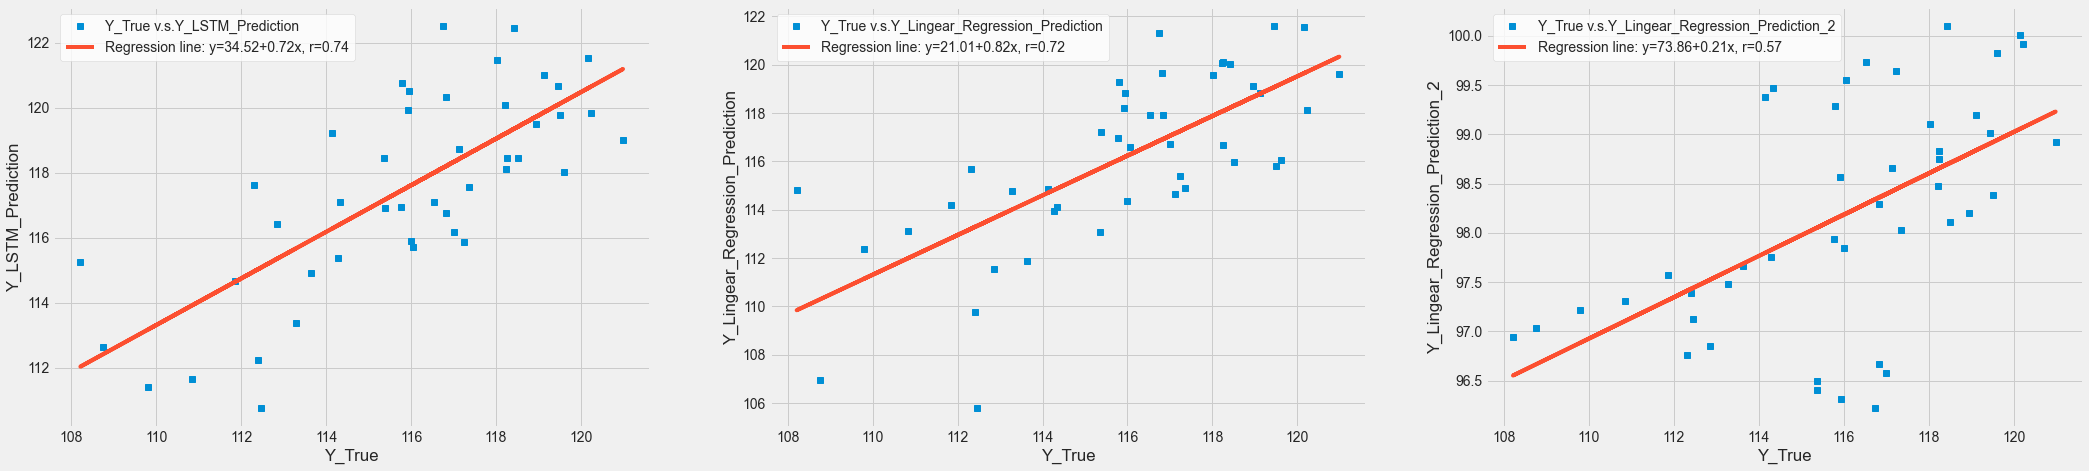

In [74]:
# ####Correlation Plot
# fig, ax = plt.subplots(1,3, figsize=(18*1.8, 4*1.8))

# #### LSTM ####
# x1 = y_true.reshape(-1)
# y1 = predictions_origin_scale.reshape(-1)
# slope, intercept, r, p, stderr = stats.linregress(x1, y1)

# line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
# #print(line)
# ax[0].plot(x1, y1, linewidth=0, marker='s', label='Y_True' + ' v.s.' + 'Y_LSTM_Prediction')
# ax[0].plot(x1, intercept + slope * x1, label=line)
# ax[0].set_xlabel('Y_True')
# ax[0].set_ylabel('Y_LSTM_Prediction')
# ax[0].legend(facecolor='white', loc='best')

# #### Linear Regression 1 ####
# x2 = y_true.reshape(-1)
# y2 = lr_predictions_origin_scale.reshape(-1)
# slope_2, intercept_2, r_2, p_2, stderr_2 = stats.linregress(x2, y2)

# line_2 = f'Regression line: y={intercept_2:.2f}+{slope_2:.2f}x, r={r_2:.2f}'
# #print(line)
# ax[1].plot(x2, y2, linewidth=0, marker='s', label='Y_True' + ' v.s.' + 'Y_Lingear_Regression_Prediction')
# ax[1].plot(x2, intercept_2 + slope_2 * x2, label=line_2)
# ax[1].set_xlabel('Y_True')
# ax[1].set_ylabel('Y_Lingear_Regression_Prediction')
# ax[1].legend(facecolor='white', loc='best')

# #### Linear Regression 2 ####
# x3 = y_true.reshape(-1)
# y3 = lr_predictions_2
# slope_3, intercept_3, r_3, p_3, stderr_3 = stats.linregress(x3, y3)

# line_3 = f'Regression line: y={intercept_3:.2f}+{slope_3:.2f}x, r={r_3:.2f}'
# #print(line)
# ax[2].plot(x3, y3, linewidth=0, marker='s', label='Y_True' + ' v.s.' + 'Y_Lingear_Regression_Prediction_2')
# ax[2].plot(x3, intercept_3 + slope_3 * x3, label=line_3)
# ax[2].set_xlabel('Y_True')
# ax[2].set_ylabel('Y_Lingear_Regression_Prediction_2')
# ax[2].legend(facecolor='white', loc='best')


# plt.show()
